<img src="../logo_UTN.svg" align="right" width="150" /> 

#### Procesamiento Digital de Señales

# Trabajo Práctico Nº3
#### Federico Borello

Hago uso de un módulo llamado `pds_utils` ubicado en el directorio base del repositorio

# Simulación de un ADC - Cuantización

Se busca simular el comportamiento de un ADC de $B$ bits con alimentación de $\pm V_F$.

Se hace uso de una senoidal:
- frecuencia $f_0 = f_s/N = \Delta f$
- amplitud unitaria

El bloque cuantizador puede interpretarse como una función que depende de los bits y de $V_F$, y se aplica a cada muestra de la señal real $S_R$:

\begin{equation}
S_Q = Q(B, V_F, S_R)
\end{equation}

- $S_Q$ es la señal cuantizada (digital)
- $Q$ es la función de cuantización
- $B$ es el número de bits utilizado para representar cada muestra
- $V_F$ es el rango dinámico de la señal (voltaje máximo)
- $S_R$ es la señal "analógica" (señal real)

La señal cuantizada, estará comprendida entre $\pm V_F$ con "niveles" definidos por el paso de cuantización:

\begin{equation}
q = \cfrac{2 \, V_F}{2^B - 1}
\end{equation}

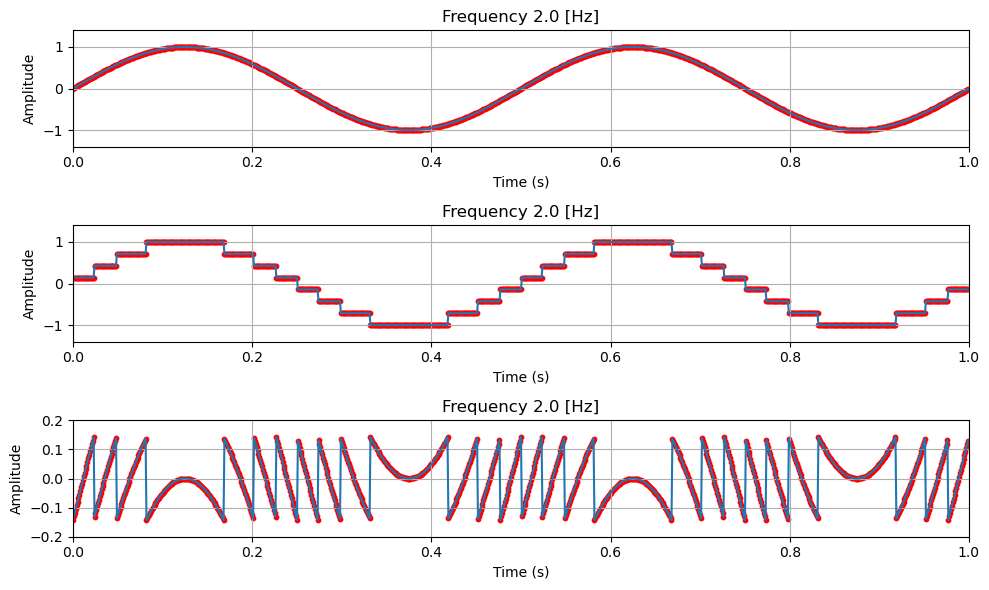

In [1]:
# @title: Cuantización de señales
import sys
import os

sys.path.append(os.path.abspath(".."))
from pds_utils import plotter, sine

import numpy as np

amplitude = 1
# Se alimenta el adc con vcc y vee
# Utilizando la amplitud de la señal
vcc = amplitude
vee = -amplitude

# Señal a cuantizar
fs = N = 1000
f = 2 * fs / N
t, sr = sine.wave(
    sampling_freq=fs, samples=N, amplitude=amplitude, dc_level=0, frequency=f
)

# bits de cuantización
bits = 3

levels = 2**bits
q = (vcc - vee) / (levels - 1)

# La señal se encuentra entre vcc y vee
s = np.clip(sr, vee, vcc)

# Se cuantiza la señal con valores positivos
s = (s - vee) / q

# Se redondea la señal para obtener los valores de la cuantización
# Si se usa ceil o floor se obtiene una función de error no centrada en 0
s = np.round(s)

# Se vuelve a escalar la señal multiplicando por q y sumando vee
sq = s * q + vee

# Se calcula el error de cuantización
e = sr - sq

# Se grafica la señal real, la cuantizada y el error de cuantización
plotter.multiple([(t, sr, f), (t, sq, f), (t, e, f)])

# Comparaciones

Se procede a hacer comparaciones usando 2, 3, 4 y 8 bits

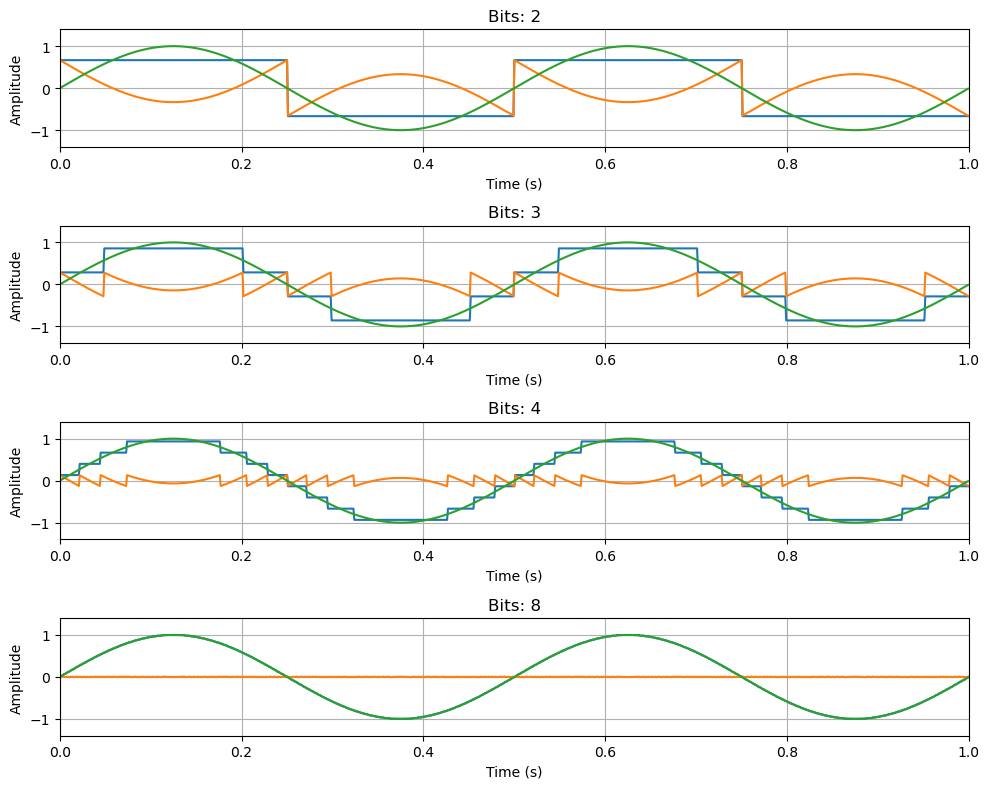

In [2]:
# @title: Comparación con distintos bits de cuantización
import sys
import os

sys.path.append(os.path.abspath(".."))
from pds_utils import adc, plotter, sine


sq1, q1 = adc.adc(sr, bits=2, vcc=2, vee=-2)
sq2, q2 = adc.adc(sr, bits=3, vcc=2, vee=-2)
sq3, q3 = adc.adc(sr, bits=4, vcc=2, vee=-2)
sq4, q4 = adc.adc(sr, bits=8, vcc=2, vee=-2)

e1 = sq1 - sr
e2 = sq2 - sr
e3 = sq3 - sr
e4 = sq4 - sr

plotter.multiple_cmp_adc(
    [([sq1, e1, sr], 2), ([sq2, e2, sr], 3), ([sq3, e3, sr], 4), ([sq4, e4, sr], 8)],
    t,
    f,
)

# Analizando el error
Se verifican las descripciones estadísticas vistas en teoría (Distribución uniforme, media, varianza, incorrelación)

Se analiza con un histograma si el error de cuantización "representa" una distribución uniforme.
- La Media debe ser 0.
- La Varianza de las muestras obtenidas en python debería coincidir con la fórmula teórica.

In [3]:
# @title: Análisis de la señal de error
from IPython.display import display, Markdown

# Calcular la varianza del error para cada número de bits
var1 = np.var(e1)
var2 = np.var(e2)
var3 = np.var(e3)
var4 = np.var(e4)

# Calcular el tamaño del paso de cuantización teórico
q_theo1 = (2 - (-2)) / (2**2 - 1)
q_theo2 = (2 - (-2)) / (2**3 - 1)
q_theo3 = (2 - (-2)) / (2**4 - 1)
q_theo4 = (2 - (-2)) / (2**8 - 1)

# Calcular la varianza teórica
# var = 1/12 * (b - a)^2
# si a = -q y b = q
# var = q^2 / 12
var_theo1 = q_theo1**2 / 12
var_theo2 = q_theo2**2 / 12
var_theo3 = q_theo3**2 / 12
var_theo4 = q_theo4**2 / 12

results = f"""
### Resultados de la Varianza del Error
- **Varianza del error (2 bits)**: $\\quad$ $\\sigma^2_2 = {var1:.8f}$ $\\quad$ (teórica: $\\sigma^2_{{\\text{{teo}},2}} = {var_theo1:.8f}$)
- **Varianza del error (3 bits)**: $\\quad$ $\\sigma^2_3 = {var2:.8f}$ $\\quad$ (teórica: $\\sigma^2_{{\\text{{teo}},3}} = {var_theo2:.8f}$)
- **Varianza del error (4 bits)**: $\\quad$ $\\sigma^2_4 = {var3:.8f}$ $\\quad$ (teórica: $\\sigma^2_{{\\text{{teo}},4}} = {var_theo3:.8f}$)
- **Varianza del error (8 bits)**: $\\quad$ $\\sigma^2_8 = {var4:.8f}$ $\\quad$ (teórica: $\\sigma^2_{{\\text{{teo}},8}} = {var_theo4:.8f}$)
"""

# Calcular la media del error para cada número de bits
mean1 = np.mean(e1)
mean2 = np.mean(e2)
mean3 = np.mean(e3)
mean4 = np.mean(e4)

# Media teórica
# mean distribución uniforme = (a+b)/2
# si a = -q y b = q
# mean = 0
mean_theo = 0

results += f"""
### Resultados de la Media del Error
- **Media del error (2 bits)**: $\\quad$ $\\mu_2 = {mean1:.8f}$ $\\quad$ (teórica: $\\mu_{{\\text{{teo}},2}} = {mean_theo:.8f}$)
- **Media del error (3 bits)**: $\\quad$ $\\mu_3 = {mean2:.8f}$ $\\quad$ (teórica: $\\mu_{{\\text{{teo}},3}} = {mean_theo:.8f}$)
- **Media del error (4 bits)**: $\\quad$ $\\mu_4 = {mean3:.8f}$ $\\quad$ (teórica: $\\mu_{{\\text{{teo}},4}} = {mean_theo:.8f}$)
- **Media del error (8 bits)**: $\\quad$ $\\mu_8 = {mean4:.8f}$ $\\quad$ (teórica: $\\mu_{{\\text{{teo}},8}} = {mean_theo:.8f}$)
"""
# Mostrar el resultado
display(Markdown(results))


### Resultados de la Varianza del Error
- **Varianza del error (2 bits)**: $\quad$ $\sigma^2_2 = 0.09562214$ $\quad$ (teórica: $\sigma^2_{\text{teo},2} = 0.14814815$)
- **Varianza del error (3 bits)**: $\quad$ $\sigma^2_3 = 0.02095412$ $\quad$ (teórica: $\sigma^2_{\text{teo},3} = 0.02721088$)
- **Varianza del error (4 bits)**: $\quad$ $\sigma^2_4 = 0.00499899$ $\quad$ (teórica: $\sigma^2_{\text{teo},4} = 0.00592593$)
- **Varianza del error (8 bits)**: $\quad$ $\sigma^2_8 = 0.00002004$ $\quad$ (teórica: $\sigma^2_{\text{teo},8} = 0.00002050$)

### Resultados de la Media del Error
- **Media del error (2 bits)**: $\quad$ $\mu_2 = 0.00266667$ $\quad$ (teórica: $\mu_{\text{teo},2} = 0.00000000$)
- **Media del error (3 bits)**: $\quad$ $\mu_3 = 0.00114286$ $\quad$ (teórica: $\mu_{\text{teo},3} = 0.00000000$)
- **Media del error (4 bits)**: $\quad$ $\mu_4 = 0.00026667$ $\quad$ (teórica: $\mu_{\text{teo},4} = 0.00000000$)
- **Media del error (8 bits)**: $\quad$ $\mu_8 = 0.00001569$ $\quad$ (teórica: $\mu_{\text{teo},8} = 0.00000000$)


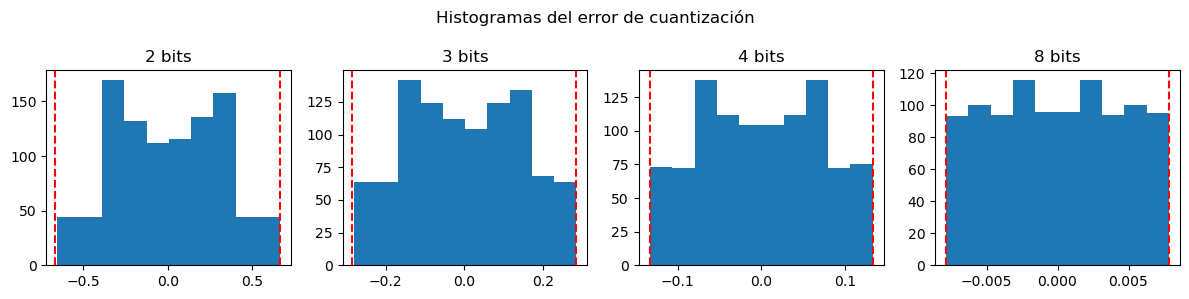

In [4]:
from matplotlib import pyplot as plt

# Crear histogramas del error
plt.figure(figsize=(12, 3))

plt.subplot(141)
plt.hist(e1, bins=10)
plt.title("2 bits")
plt.axvline(x=-q1/2, color='r', linestyle='--')
plt.axvline(x=q1/2, color='r', linestyle='--')

plt.subplot(142)
plt.hist(e2, bins=10)
plt.title("3 bits")
plt.axvline(x=-q2/2, color='r', linestyle='--')
plt.axvline(x=q2/2, color='r', linestyle='--')

plt.subplot(143)
plt.hist(e3, bins=10)
plt.title("4 bits")
plt.axvline(x=-q3/2, color='r', linestyle='--')
plt.axvline(x=q3/2, color='r', linestyle='--')

plt.subplot(144)
plt.hist(e4, bins=10)
plt.title("8 bits")
plt.axvline(x=-q4/2, color='r', linestyle='--')
plt.axvline(x=q4/2, color='r', linestyle='--')

plt.suptitle("Histogramas del error de cuantización")
plt.tight_layout()
plt.show()

# Conclusiones

Se aprecia que a medida que aumentan los bits, más uniforme es la distribución del error, los valores están acotados entre $-q/2 \wedge q/2$, la media tiende a 0, y la varianza obtenida con la muestra es aproximadamente igual a la varianza teórica.